In [2]:
from detector import CornerDetector
import cv2
import matplotlib.pyplot as plt

In [3]:
detector = CornerDetector('../../../new_version.pt')
detector.device_info()

Model summary: 129 layers, 3,012,603 parameters, 0 gradients, 8.2 GFLOPs
Is GPU available?: True
GPU count: 1
Device name: NVIDIA GeForce GTX 1070


In [4]:
IMG_PATH = "../../../Screenshot 2025-03-01 121029.jpg"

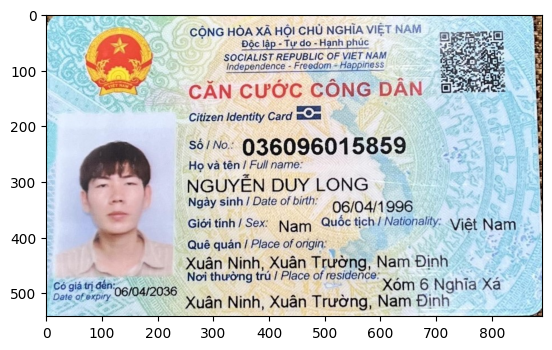

In [5]:
img = cv2.imread(IMG_PATH)
plt.imshow(img[:,:,::-1])

In [6]:
results = detector.predict(IMG_PATH)


image 1/1 c:\Users\admin\Desktop\CV_Project\src\modules\corner-detector\..\..\..\Screenshot 2025-03-01 121029.jpg: 416x640 1 id, 1 full_name, 2 date_of_births, 1 sex, 1 nationality, 1 place_of_origin, 1 place_of_residence, 1 date_of_expiry, 1 qr_code, 55.9ms
Speed: 4.5ms preprocess, 55.9ms inference, 119.9ms postprocess per image at shape (1, 3, 416, 640)


In [7]:
for result in results:
    print(result.boxes) 

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 1., 8., 2., 6., 7., 5., 3., 4., 2.], device='cuda:0')
conf: tensor([0.9963, 0.9851, 0.9384, 0.9310, 0.9057, 0.8405, 0.7514, 0.6998, 0.6835, 0.4788], device='cuda:0')
data: tensor([[3.4342e+02, 2.1343e+02, 6.5849e+02, 2.6433e+02, 9.9626e-01, 0.0000e+00],
        [2.4228e+02, 2.8538e+02, 5.9273e+02, 3.2695e+02, 9.8511e-01, 1.0000e+00],
        [7.0228e+02, 2.3950e+01, 8.2878e+02, 1.4832e+02, 9.3840e-01, 8.0000e+00],
        [5.0409e+02, 3.2658e+02, 6.7104e+02, 3.6412e+02, 9.3101e-01, 2.0000e+00],
        [5.9861e+02, 4.6671e+02, 8.2860e+02, 5.0601e+02, 9.0567e-01, 6.0000e+00],
        [1.1879e+02, 4.8320e+02, 2.4208e+02, 5.1434e+02, 8.4051e-01, 7.0000e+00],
        [2.6220e+02, 4.2644e+02, 7.3393e+02, 4.6537e+02, 7.5140e-01, 5.0000e+00],
        [4.0554e+02, 3.6058e+02, 4.8619e+02, 4.0104e+02, 6.9983e-01, 3.0000e+00],
        [7.1874e+02, 3.5551e+02, 8.5393e+02, 4.0026e+02, 6.8350e-01, 4.0000e+00],
        [7.1658

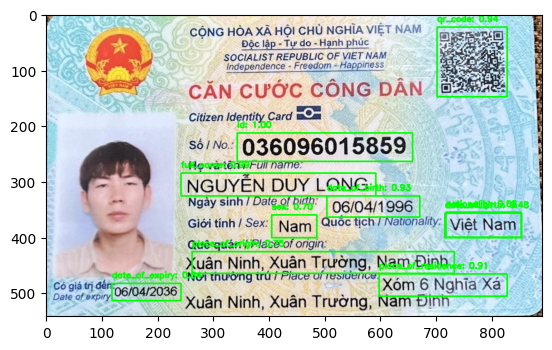

In [ ]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Lấy toạ độ (x1, y1, x2, y2)
        confidence = box.conf[0].item()  # Lấy độ chính xác
        class_id = int(box.cls[0])  # Lấy ID của class
        label = f"{detector.get_model().names[class_id]}: {confidence:.2f}"  # Tạo label

        # Vẽ bounding box lên ảnh
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Màu xanh lá, độ dày 2px
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.imshow(img[:,:,::-1])